<center>
    
# **The Cooper Pair Box Qubit**
### About Islands on superconducting circuits
    
![Island](https://intrepidtravel.com/adventures/wp-content/uploads/2018/02/Intrepid-Travel-Peru_FloatingIsland_Drone_01.jpg "Optional Title")

###  Curso de Circuitos Cuánticos Superconductores, Usach 2024-1

#### [Ricardo Quispe M.](https://github.com/RcrdPhysics)
#### Institución: Universidad de Santiago de Chile
#### Correo: ricardo.quispe@usach.cl
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.


In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

The Hamiltonian of the Cooper box is given by
$$
H = 4E_C \sum_N (N-N_g)^2 |N \rangle \langle N |
- 
\frac{1}{2}E_j \sum_N
\big[
|N+1\rangle \langle N| +  |N-1\rangle \langle N|
\big]
$$
For simplicity, we set $E_C = 1$ and measure all energies relative to $E_C$. The following function calculates the eigenvalues of the Hamiltonian with $E_0 = 0$.


### Graficando caso $E_c=1, E_j=0$

In [2]:
####################################################
# Return the energy eigenvalues of the unperturbed #
# Hamiltonian (the diagonal part)                  #
####################################################
def E0(N, Ng):
    return (N-Ng)**2

Now we plot the eigenvalues for different values of $N_g$. We plot three curves, corresponding to N=-1,0,1

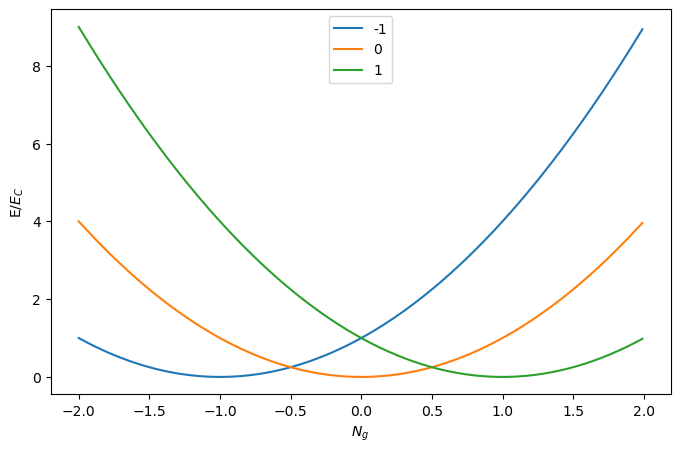

In [3]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
R = np.arange(-2,2,0.01)
ax.plot(R,E0(-1,R),label='-1')
ax.plot(R,E0(0,R),label='0')
ax.plot(R,E0(1,R),label='1')
ax.set_ylabel("E/$E_C$",fontsize=10)
ax.set_xlabel("$N_g$", fontsize=10)
ax.legend()

plt.show()

### Graficando $E_j\neq0$ y $E_c/E_j = 1 $

We now study the behaviour for non-zero values of $E_0$. To do this, we approximate the Hamiltonian by the Hamiltonian on a finite subspace. This is a hermitian matrix for which we can find the eigenvalues using standard methods. More specifically, we introduce the parameter prec and restrict the Hamiltonian to the subspace of dimension $2*prec + 1$ spanned by the vectors $|n\rangle$ with $-prec \leq n \leq prec$.

In [4]:
#######################################################
# Return a finite part of the Hamiltonian             #
# prec = precision                                    #
# Ej = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def hamiltonian(Ec,Ej,Ng,prec=10):
    H0 = 4*Ec * np.diag((np.arange(-prec, prec+1)-Ng)**2, 0)
    V = -0.5*Ej * np.diag(np.ones(2*prec),1)   -0.5*Ej * np.diag(np.ones(2*prec),-1)
    return H0 + V

In [5]:
#######################################################
# Return an approximation of the n-th energy          #
# Ej = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def solve(Ec,Ej,Ng,n, prec=10):
    H = hamiltonian(Ec, Ej, Ng, prec)
    E, v = np.linalg.eig(H)
    s = np.argsort(E)
    return E[s[n]], v[:,s[n]], H


### Gaficamos la energía $E/E_c$ vs $N_g$

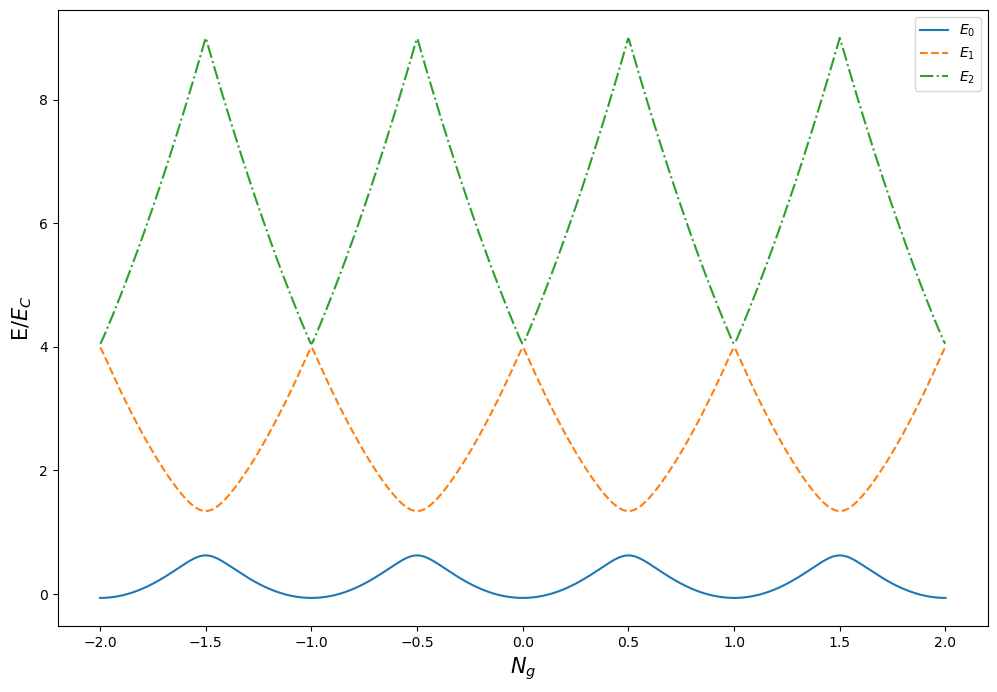

In [6]:
def plot(axis, Ej, R, n, prec=10, linestyle='-'):
    y = []
    Ec=1.39
    for r in R:
        E, _, _ = solve(Ec, Ej, r, n, prec=prec)
        y.append(E/Ec) #Aquí era el error de escala, el plot es E/Ec
    axis.plot(R, y, linestyle, label=f'$E_{n}$')

# Parámetros
Ej = 1
R = np.linspace(-2, 2, 1000)
prec = 5

# Estilos de línea para cada n
linestyles = ['-', '--', '-.']

# Graficar
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

for n, linestyle in enumerate(linestyles):
    plot(ax, Ej=Ej, R=R, n=n, prec=prec, linestyle=linestyle)

ax.set_ylabel("E/$E_C$", fontsize=15)
ax.set_xlabel("$N_g$", fontsize=15)
ax.legend()
plt.show()

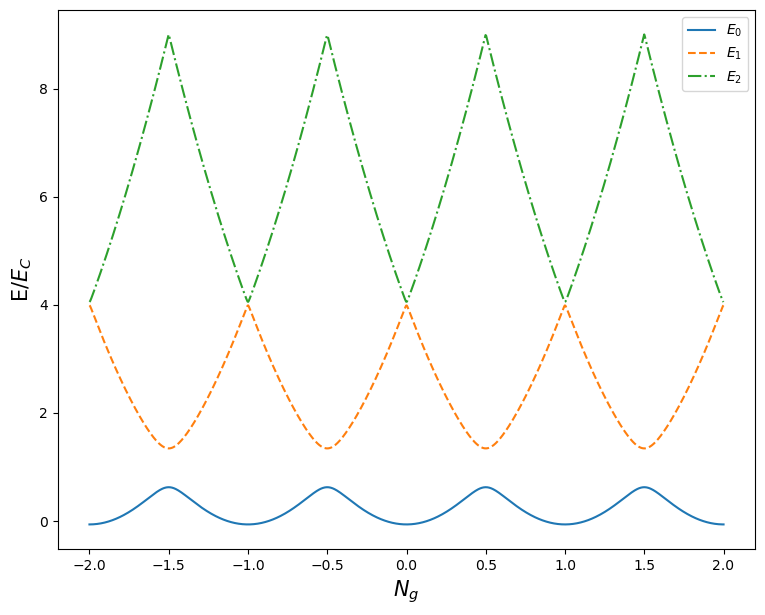

In [7]:
# Graficar
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(1, 1, 1)

for n, linestyle in enumerate(linestyles):
    plot(ax, Ej=Ej, R=R, n=n, prec=prec, linestyle=linestyle)

ax.set_ylabel("E/$E_C$", fontsize=15)
ax.set_xlabel("$N_g$", fontsize=15)
ax.legend()
plt.show()

### Graficamos $<\psi_i|N|\psi_i>$ vs $N_g$

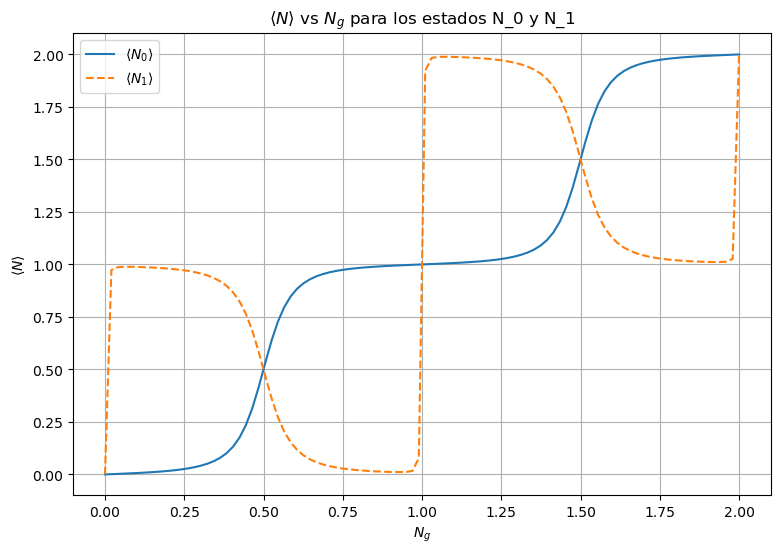

In [8]:
# Calcular <N> para diferentes valores de Ng
def calculate_N_expectation(Ec, Ej, Ng, n, prec=10):
    _, v, _ = solve(Ec, Ej, Ng, n, prec)
    N_operator = np.diag(np.arange(-prec, prec+1))
    N_expectation = np.dot(v.conj().T, np.dot(N_operator, v))
    return N_expectation.real

# Parámetros
Ec = 1.39
Ej = 1
Ng_values = np.linspace(0, 2, 100)
prec = 10

# Calcular <N> para N_0 y N_1
N0_expectations = [calculate_N_expectation(Ec, Ej, Ng, 0, prec) for Ng in Ng_values]
N1_expectations = [calculate_N_expectation(Ec, Ej, Ng, 1, prec) for Ng in Ng_values]

fig = plt.figure(figsize=(9,6))

# Graficar <N> vs Ng para N_0 y N_1
plt.plot(Ng_values, N0_expectations, label='$\langle N_0 \\rangle$')
plt.plot(Ng_values, N1_expectations,'--', label='$\langle N_1 \\rangle$')
plt.xlabel('$N_g$')
plt.ylabel('$\langle N \\rangle$')
plt.title('$\langle N \\rangle$ vs $N_g$ para los estados N_0 y N_1')
plt.legend()
plt.grid(True)
plt.show()



### Graficamos las autoenergías para $E_0$ y $E_1$

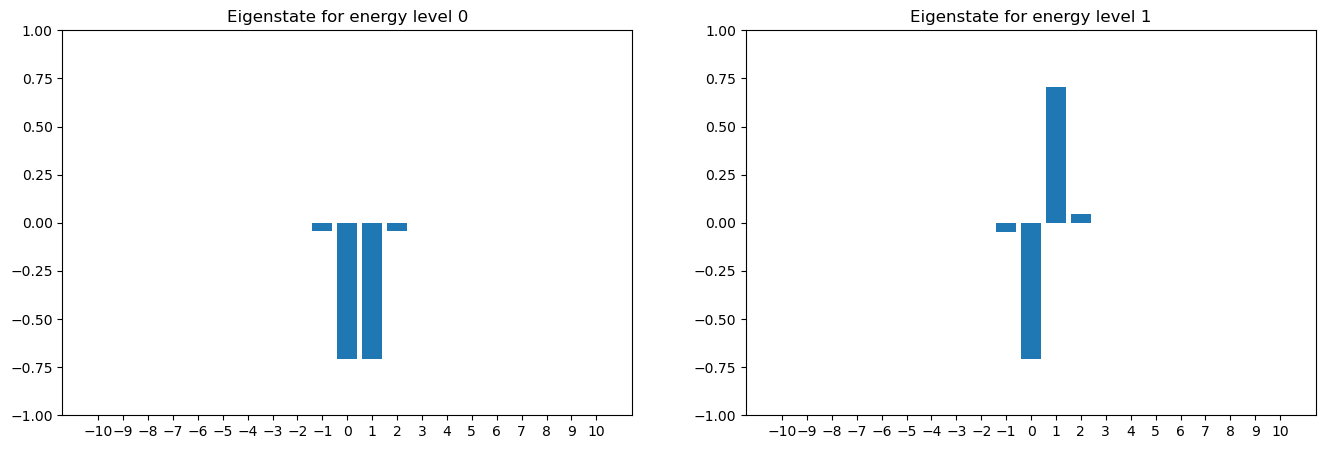

In [9]:
#####################################################
# Now plot the eigenstates in the N-representation  #
# at the point Ng                                   #
#####################################################
Ng = 0.5
fig = plt.figure(figsize=(25,5))
vectors = 2
for i in range(vectors):
    ax = fig.add_subplot(1,vectors+1,i+1)
    E,v,H = solve(1., Ej=Ej, Ng=Ng, n = i, prec=prec)
    v = v / np.linalg.norm(v)
    ax.bar(range(-prec,prec+1), v)
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(-prec,prec+1))
    ax.set_title("Eigenstate for energy level "+str(i))


plt.show()

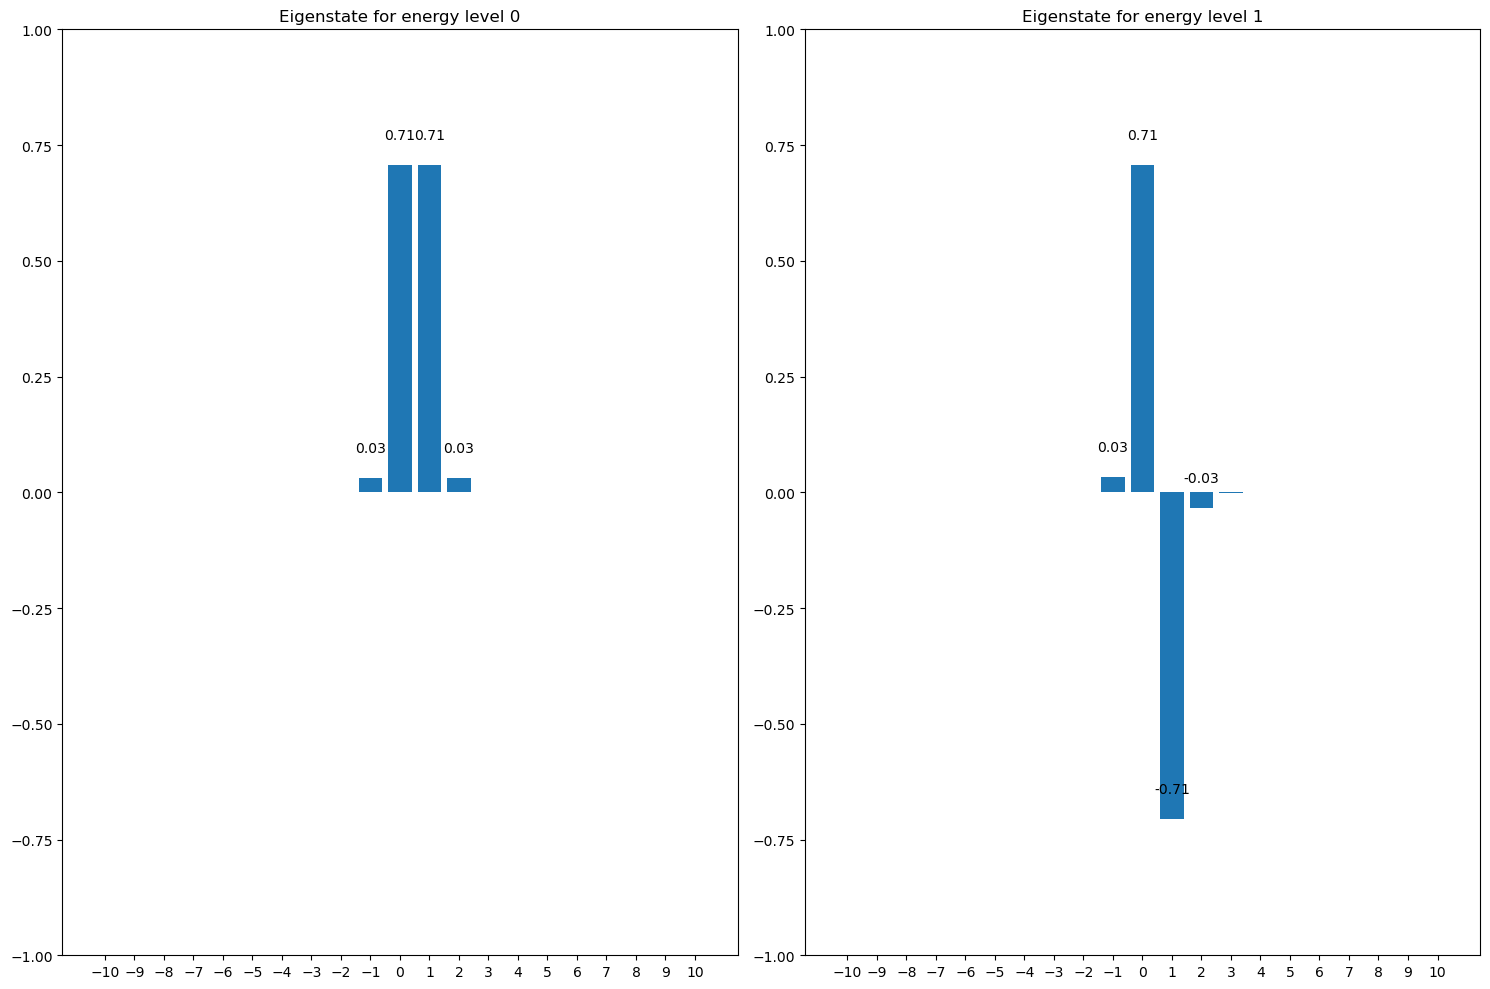

In [10]:
Ng = 0.5
vectors = 2

fig = plt.figure(figsize=(15, 10))

for i in range(vectors):
    ax = fig.add_subplot(1, vectors, i + 1)
    E, v, H = solve(1.39, Ej=Ej, Ng=Ng, n=i, prec=prec)
    v = v / np.linalg.norm(v)
    
    # Graficar el histograma del eigenestado
    bars = ax.bar(range(-prec, prec + 1), v)
    
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(-prec, prec + 1))
    ax.set_title("Eigenstate for energy level " + str(i))
    
    # Añadir etiquetas con los valores de las barras
    for bar, value in zip(bars, v):
        height = bar.get_height()
        if np.abs(value) >= 0.01:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{value:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

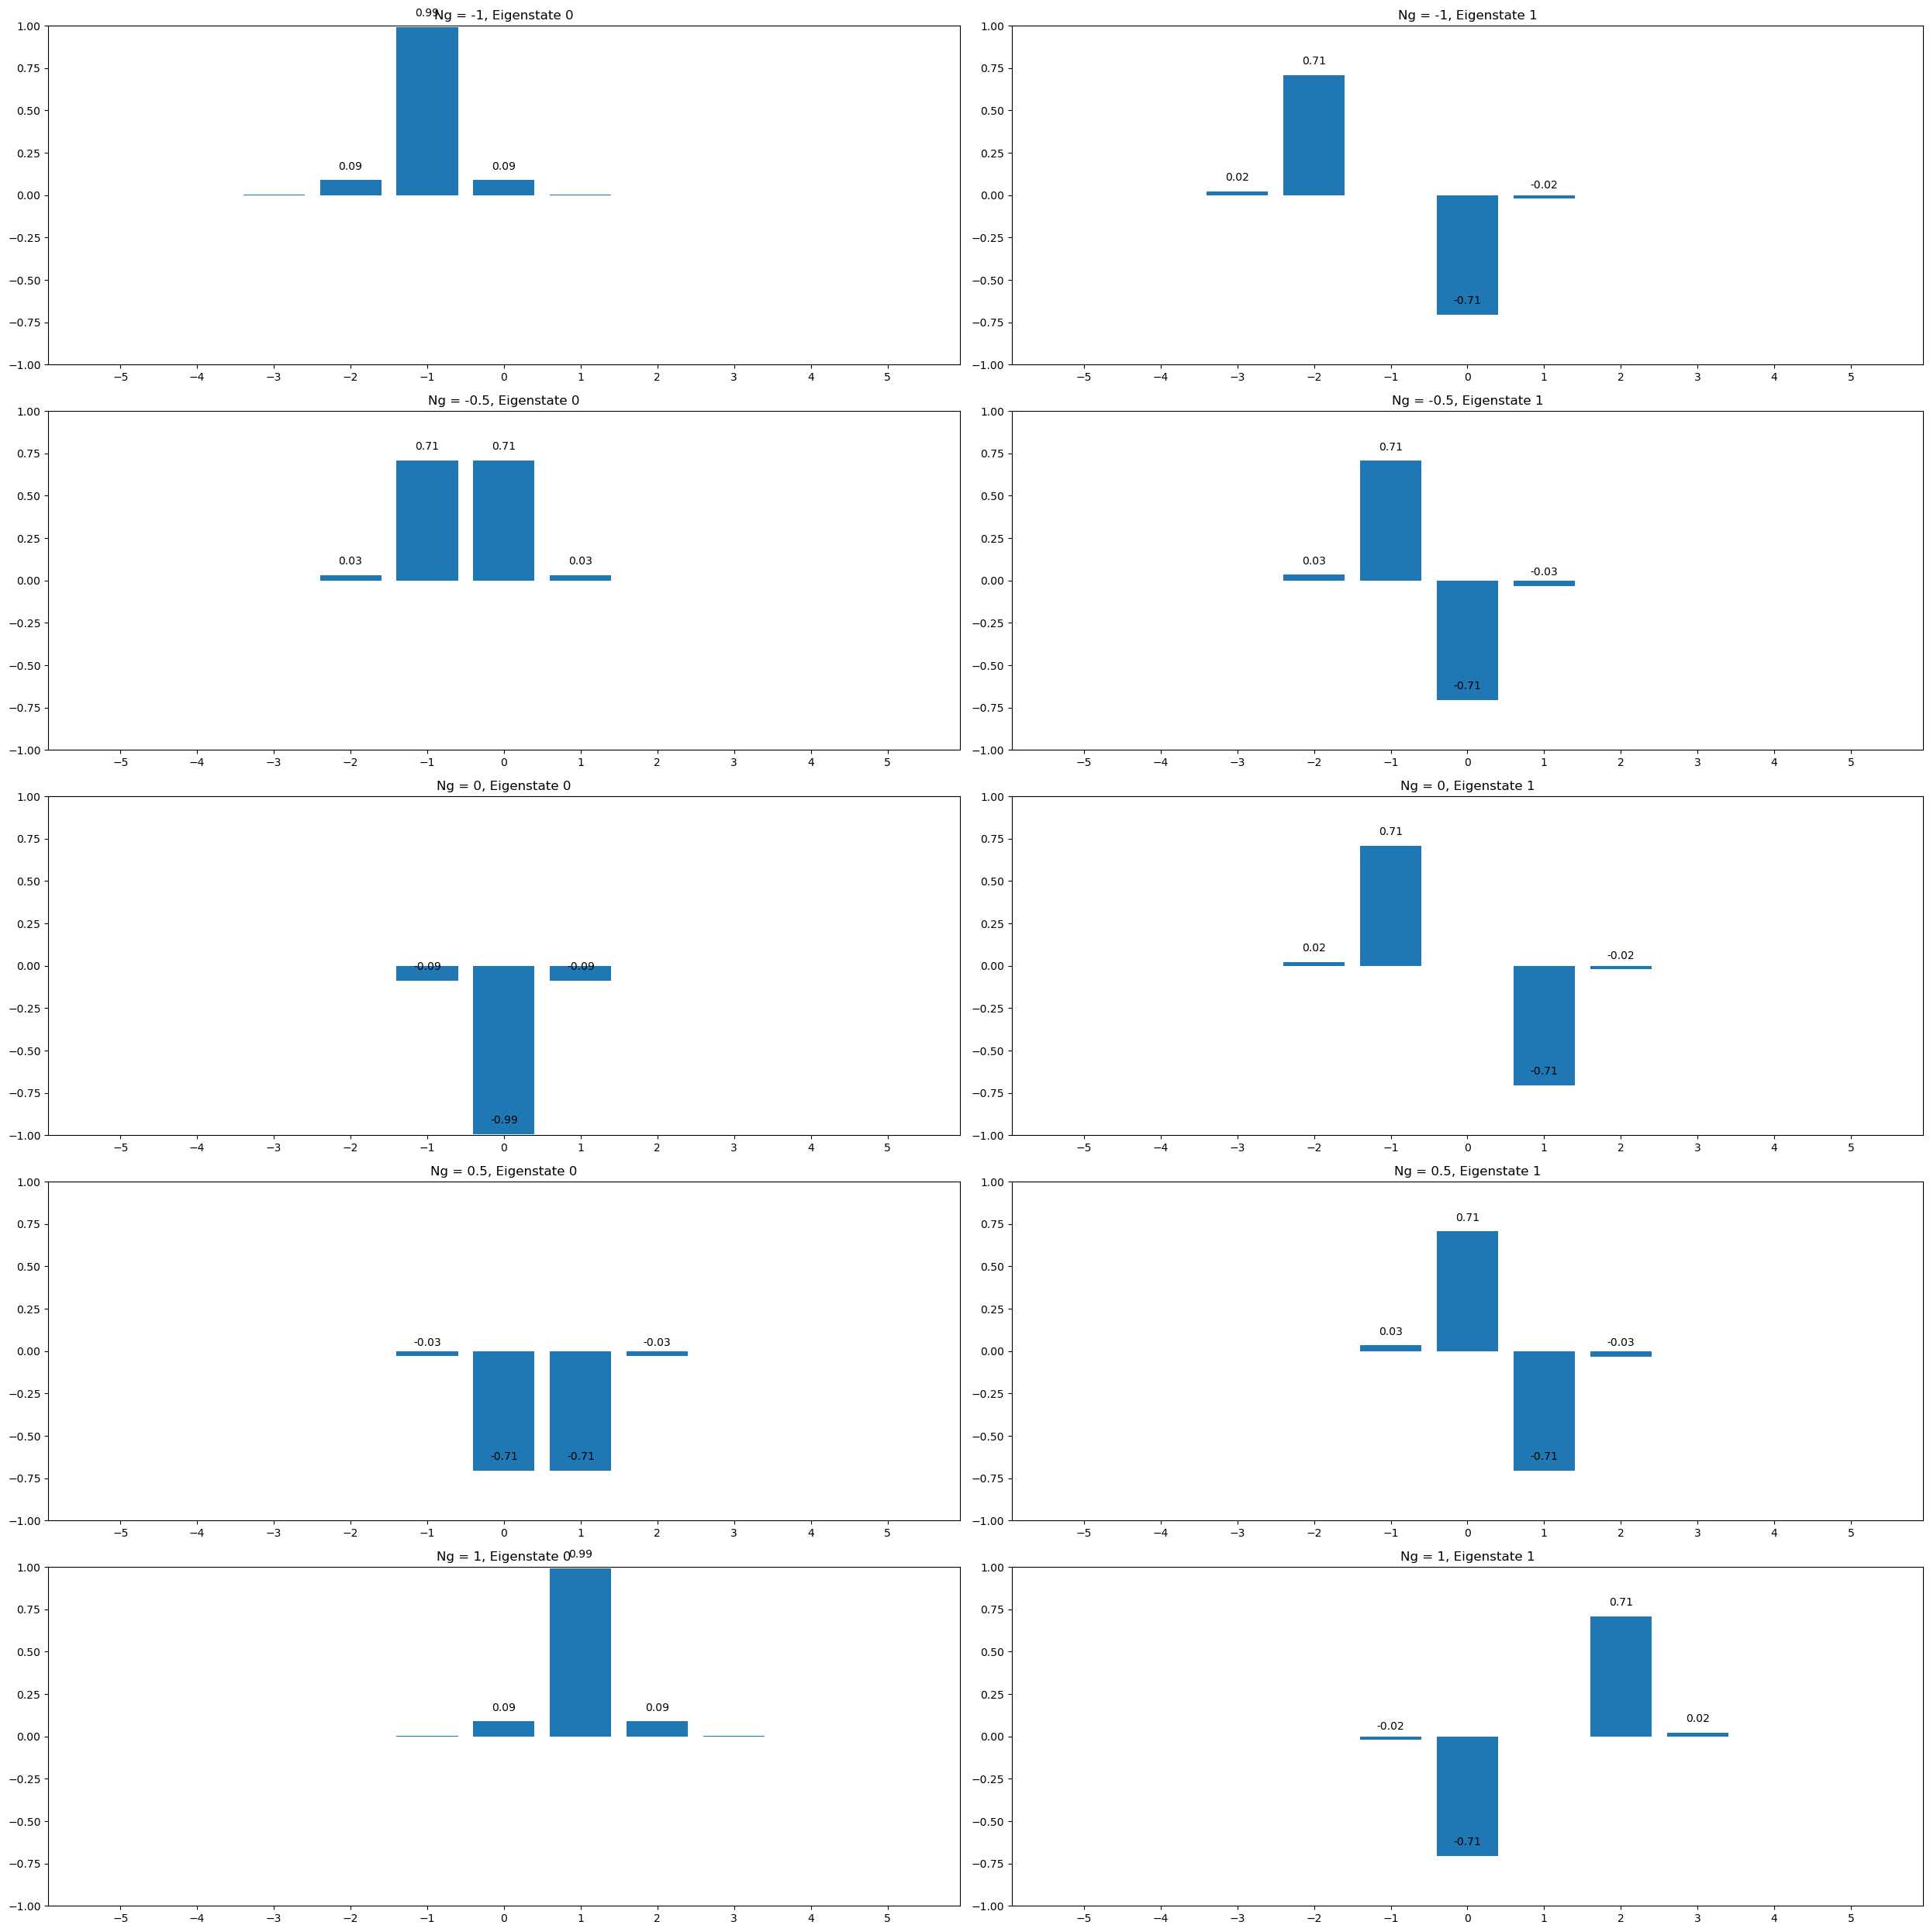

In [11]:
# Parámetros
Ej = 1.0
Ng_values = [-1, -0.5, 0, 0.5, 1]
prec = 5
vectors = 2

fig, axs = plt.subplots(len(Ng_values), vectors, figsize=(25, 5*len(Ng_values)))

# Iterar sobre cada valor de Ng
for i, Ng in enumerate(Ng_values):
    for j in range(vectors):
        ax = axs[i, j]
        E, v, H = solve(1.39, Ej=Ej, Ng=Ng, n=j, prec=prec)
        v = v / np.linalg.norm(v)

        # Graficar el histograma del eigenestado
        bars = ax.bar(range(-prec, prec + 1), v)

        ax.set_ylim(-1, 1)
        ax.set_xticks(range(-prec, prec + 1))
        ax.set_title(f"Ng = {Ng}, Eigenstate {j}")
        
        # Añadir etiquetas con los valores de las barras
        for bar, value in zip(bars, v):
            height = bar.get_height()
            if np.abs(value) >= 0.01:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ricardo Quispe, QuantumQuipu & Usach

## Recursos útiles
* ["Coherent control of macroscopic quantum states in a single-Cooper-pair box"](https://www.nature.com/articles/19718)

![USACH](https://scontent.fscl37-1.fna.fbcdn.net/v/t39.30808-6/361922468_778358597420198_8109719161685074737_n.png?_nc_cat=107&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeHPzwcTnynXm7y8EYtlthIovN7srtMPX0O83uyu0w9fQ0-3YLKnsQcCZcUmUDvebinTBB-R3moZM6B6CYNFupQa&_nc_ohc=OAiiLxZzMN4Q7kNvgEpE1Jy&_nc_ht=scontent.fscl37-1.fna&oh=00_AYA9TZSfw5I32eBPvk53dNigBfyczpsc-OaLVIcjrvxitA&oe=667B13D1 "USACH")
